Visualizza grafici esportati sulle emissioni

In [1]:
main_path = "../../"

import matplotlib.pyplot as plt
import sys
sys.path.append(main_path)

from src.utils.fs import get_csv_lines

In [5]:
def plot_emission_graph(results, name, fps = 120):
    plt.figure(figsize=(10, 6))

    # Plotta le distribuzioni
    for res in results:
        cumulation = [float(cumul) for count, cumul in res]
        time_in_seconds = [f / fps for f in range(len(cumulation))]
        plt.plot(time_in_seconds, cumulation, label=f"{name}")

    plt.xlabel('Tempo (s)')
    plt.ylabel('Emissioni cumulative per PM_10')
    plt.title(f'Grafico di accumulo delle emissioni per {name}')
    plt.legend()
    plt.grid(True)

    # Mostra il grafico
    plt.show()

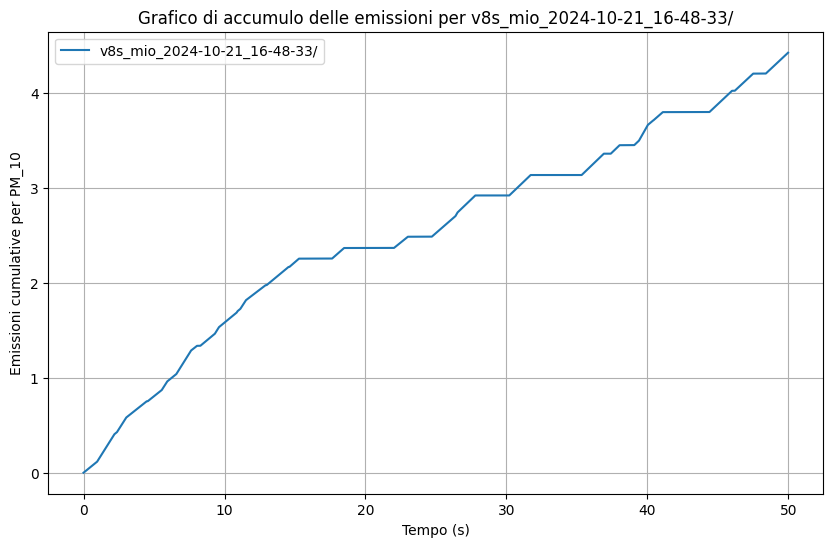

In [6]:
timestamp_folders = ["v8s_mio_2024-10-21_16-48-33/"]
results_name = "IMG_0506.csv"
input_folders = [f"{main_path}results/pollution/{ts}{results_name}" for ts in timestamp_folders]
cums = {}
vehs = []
fps = 120
i = 0

results = []
for model_name, input_folder in zip(timestamp_folders, input_folders):
    results.append(get_csv_lines(input_folder))
    plot_emission_graph(results, model_name, fps)
